Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.1445 - val_loss: 0.0304
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0179 - val_loss: 0.0319
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0145 - val_loss: 0.0236
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - val_loss: 0.0230
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0125 - val_loss: 0.0207
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step


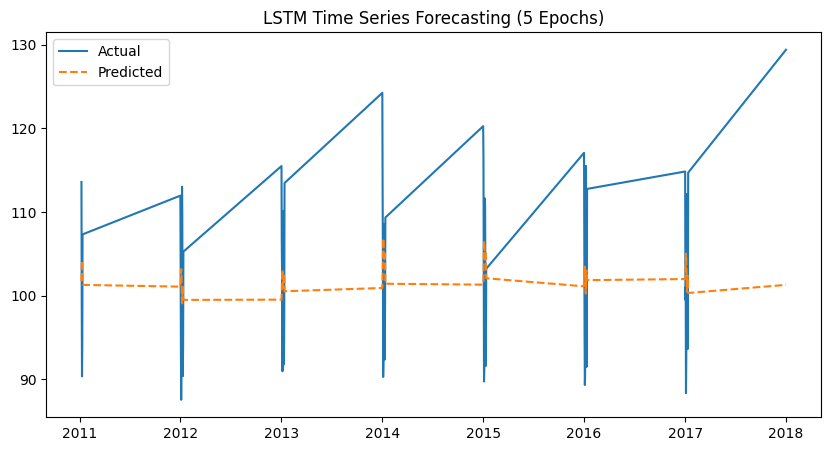

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Electric_Production.csv")  # Replace with your actual filename

# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)
df.set_index('DATE', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10  # Define sequence length
X, y = create_sequences(df_scaled, SEQ_LENGTH)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))  # Changed epochs to 5

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Visualize results
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(df.index[-len(y_test):], y_pred_rescaled, label="Predicted", linestyle="dashed")
plt.legend()
plt.title("LSTM Time Series Forecasting (5 Epochs)")
plt.show()
